<a href="https://colab.research.google.com/github/yesyum/PRODIGY_ML_02/blob/main/PRODIGY_ML_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import numpy as numpy
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:

df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
df.isna().sum()


CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [ ]:
df.shape


(200, 5)

In [ ]:
df = df.rename(columns={'Annual Income (k$)': "Annual_Income",
                   'Spending Score (1-100)':'Spend'})
df.head()

,CustomerID,Gender,Age,Annual_Income,Spend
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


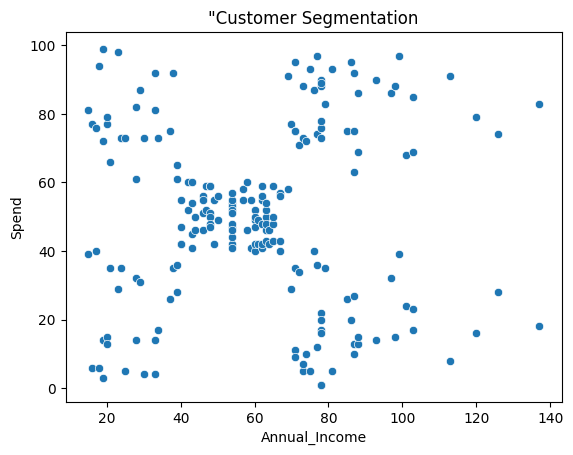

In [ ]:

sns.scatterplot(x='Annual_Income', y='Spend', palette='Set2',data=df)
plt.title('"Customer Segmentation')
plt.show()

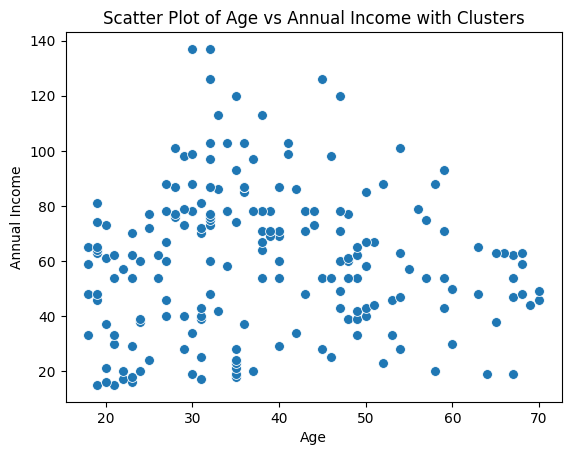

In [ ]:
sns.scatterplot(x='Age', y='Annual_Income', data=df, palette='viridis', s=50)
plt.title('Scatter Plot of Age vs Annual Income with Clusters')
plt.xlabel('Age')
plt.ylabel('Annual Income')
plt.show()

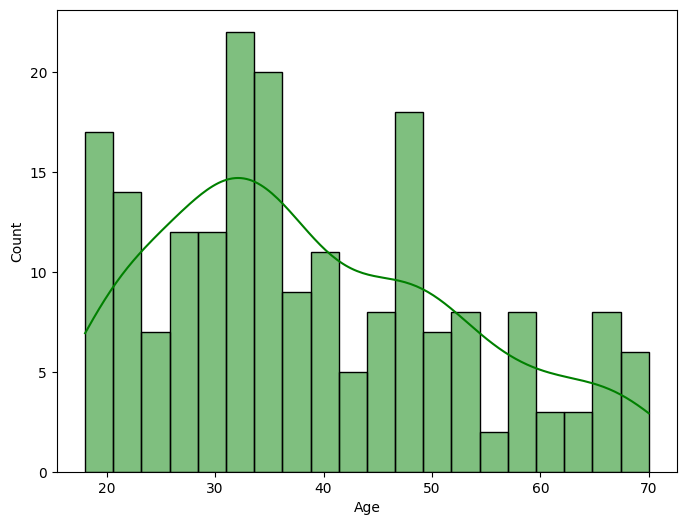

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(df["Age"], kde=True, bins=20, color='green')
plt.xlabel("Age")
plt.show()

In [ ]:

df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})
df.head()

,CustomerID,Gender,Age,Annual_Income,Spend
0,1,0,19,15,39
1,2,0,21,15,81
2,3,1,20,16,6
3,4,1,23,16,77
4,5,1,31,17,40


In [ ]:
X = df[['Annual_Income', 'Spend']]

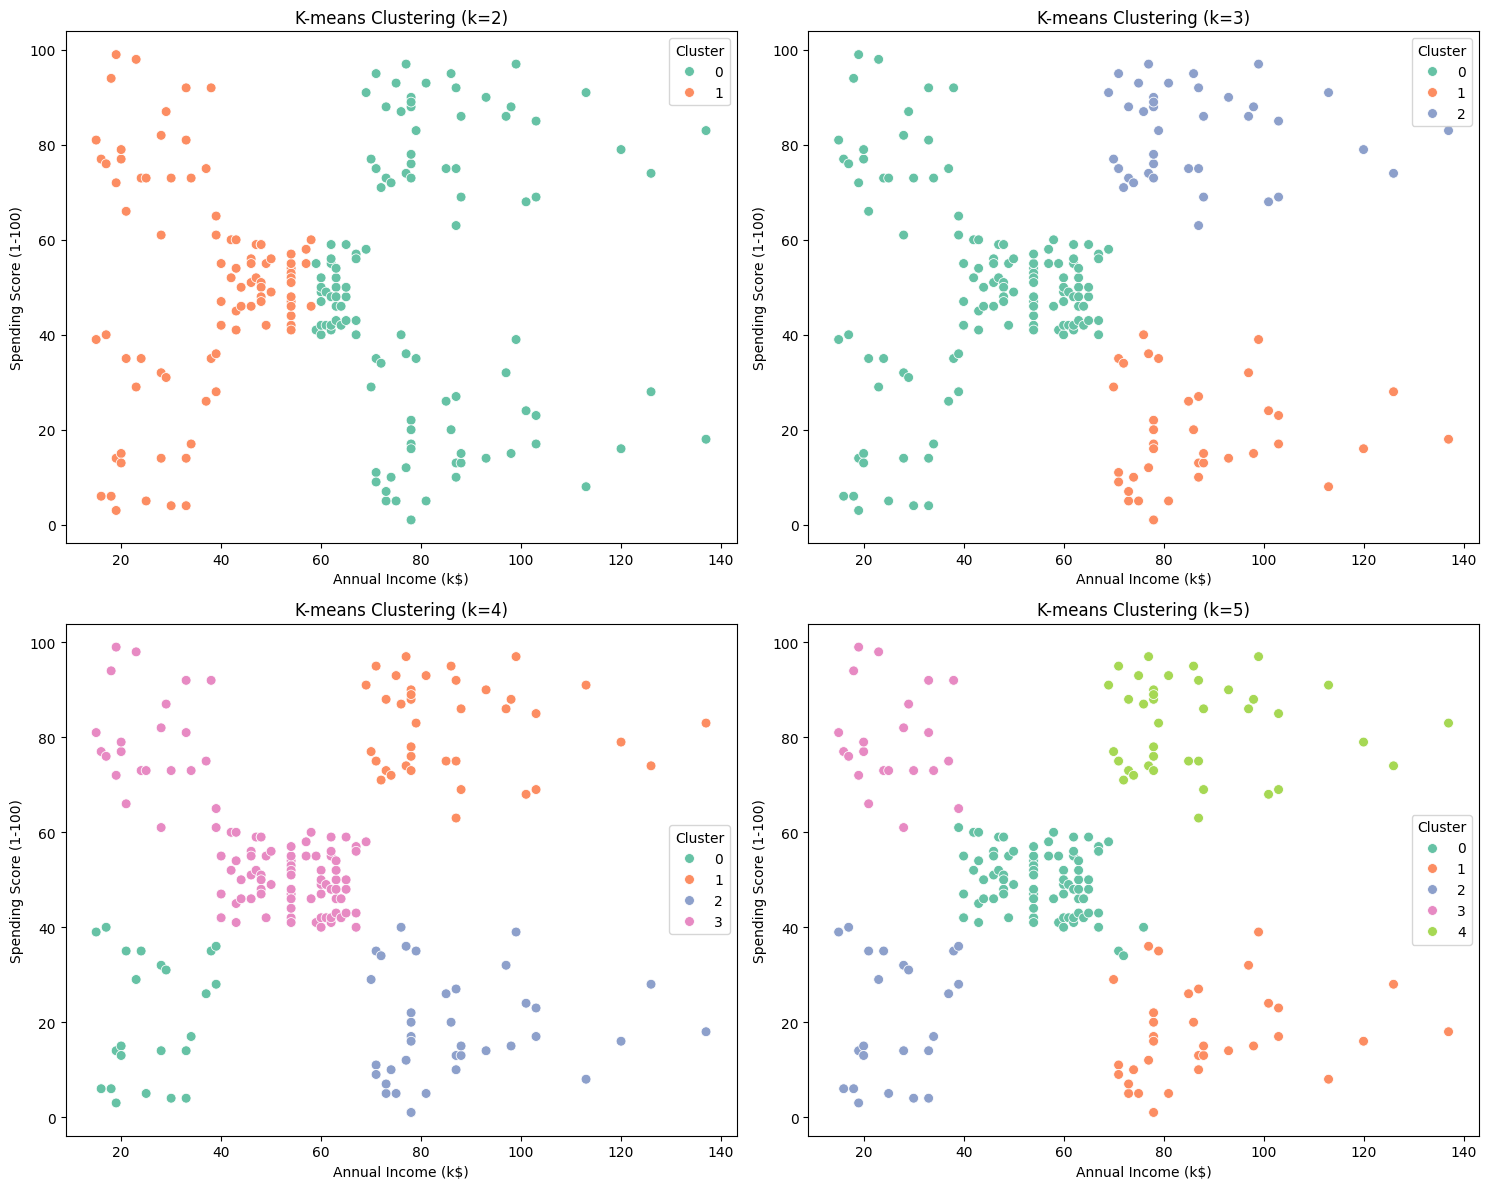

In [ ]:
from sklearn.cluster import KMeans
k_values = [2, 3, 4, 5]

fig, axes = plt.subplots(2, 2, figsize=(15, 12))
axes = axes.flatten()

for i, k in enumerate(k_values):
    # Apply K-means clustering
    kmeans = KMeans(n_clusters=k, random_state=42)
    df['Cluster'] = kmeans.fit_predict(X)

    # Scatter plot with color based on cluster
    sns.scatterplot(x='Annual_Income', y='Spend', hue='Cluster', data=df, palette='Set2', s=50, ax=axes[i])

    axes[i].set_title(f'K-means Clustering (k={k})')
    axes[i].set_xlabel('Annual Income (k$)')
    axes[i].set_ylabel('Spending Score (1-100)')

plt.tight_layout()
plt.show()

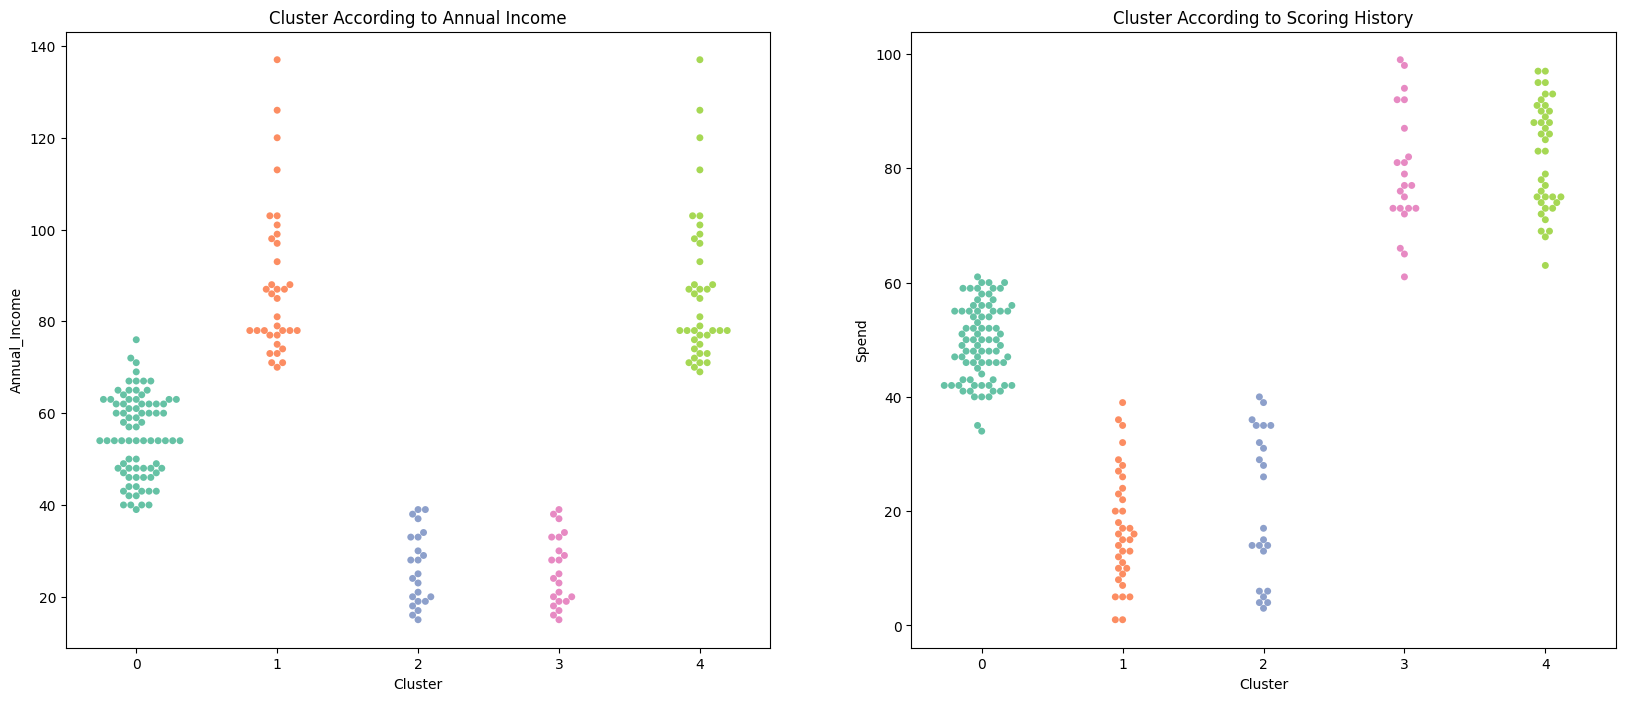

In [ ]:
fig = plt.figure(figsize=(20,8))
ax = fig.add_subplot(121)
sns.swarmplot(x=df['Cluster'], y=df['Annual_Income'], data=df, palette='Set2',ax=ax)
ax.set_title('Cluster According to Annual Income')

ax = fig.add_subplot(122)
sns.swarmplot(x='Cluster', y='Spend', data=df,palette='Set2', ax=ax)
ax.set_title('Cluster According to Scoring History')

plt.show()